## POS tagging using modified Viterbi

### Problem Statement: Modify the Viterbi algorithm to solve the problem of unknown words

### Data Preparation

In [1]:
#Importing libraries
import nltk, re, pprint
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import pprint, time
import random
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize

In [2]:
# reading the Treebank tagged sentences
nltk_data = list(nltk.corpus.treebank.tagged_sents(tagset='universal'))

In [3]:
nltk_data[:3]

[[('Pierre', 'NOUN'),
  ('Vinken', 'NOUN'),
  (',', '.'),
  ('61', 'NUM'),
  ('years', 'NOUN'),
  ('old', 'ADJ'),
  (',', '.'),
  ('will', 'VERB'),
  ('join', 'VERB'),
  ('the', 'DET'),
  ('board', 'NOUN'),
  ('as', 'ADP'),
  ('a', 'DET'),
  ('nonexecutive', 'ADJ'),
  ('director', 'NOUN'),
  ('Nov.', 'NOUN'),
  ('29', 'NUM'),
  ('.', '.')],
 [('Mr.', 'NOUN'),
  ('Vinken', 'NOUN'),
  ('is', 'VERB'),
  ('chairman', 'NOUN'),
  ('of', 'ADP'),
  ('Elsevier', 'NOUN'),
  ('N.V.', 'NOUN'),
  (',', '.'),
  ('the', 'DET'),
  ('Dutch', 'NOUN'),
  ('publishing', 'VERB'),
  ('group', 'NOUN'),
  ('.', '.')],
 [('Rudolph', 'NOUN'),
  ('Agnew', 'NOUN'),
  (',', '.'),
  ('55', 'NUM'),
  ('years', 'NOUN'),
  ('old', 'ADJ'),
  ('and', 'CONJ'),
  ('former', 'ADJ'),
  ('chairman', 'NOUN'),
  ('of', 'ADP'),
  ('Consolidated', 'NOUN'),
  ('Gold', 'NOUN'),
  ('Fields', 'NOUN'),
  ('PLC', 'NOUN'),
  (',', '.'),
  ('was', 'VERB'),
  ('named', 'VERB'),
  ('*-1', 'X'),
  ('a', 'DET'),
  ('nonexecutive', 'ADJ'),
 

In [4]:
# converting the list of sents to a list of (word, pos tag) tuples
tagged_words = [tup for sent in nltk_data for tup in sent]
print(len(tagged_words))
tagged_words[:10]

100676


[('Pierre', 'NOUN'),
 ('Vinken', 'NOUN'),
 (',', '.'),
 ('61', 'NUM'),
 ('years', 'NOUN'),
 ('old', 'ADJ'),
 (',', '.'),
 ('will', 'VERB'),
 ('join', 'VERB'),
 ('the', 'DET')]

We now have a list of about 100676 (word, tag) tuples. Let's now do some exploratory analyses.

### Exploratory Analysis

In [5]:
tags = [pair[1] for pair in tagged_words]
unique_tags = set(tags)
len(unique_tags)

12

There are 12 unique POS tags in the corpus

In [6]:
from collections import Counter
tag_counts = Counter(tags)
tag_counts

Counter({'NOUN': 28867,
         '.': 11715,
         'NUM': 3546,
         'ADJ': 6397,
         'VERB': 13564,
         'DET': 8725,
         'ADP': 9857,
         'CONJ': 2265,
         'X': 6613,
         'ADV': 3171,
         'PRT': 3219,
         'PRON': 2737})

Frequency of each tags in the corpus

In [7]:
tag_counts.most_common(5)

[('NOUN', 28867), ('VERB', 13564), ('.', 11715), ('ADP', 9857), ('DET', 8725)]

Thus, NOUN is the most common tag followed by VERB, ., ADP, DET etc. 

In [8]:
# ADJ: adjective
# ADP: adposition
# ADV: adverb
# AUX: auxiliary
# CCONJ: coordinating conjunction
# DET: determiner
# INTJ: interjection
# NOUN: noun
# NUM: numeral
# PART: particle
# PRON: pronoun
# PROPN: proper noun
# PUNCT: punctuation
# SCONJ: subordinating conjunction
# SYM: symbol
# VERB: verb
# X: other

In [9]:
bank = [pair for pair in tagged_words if pair[0].lower() == 'bank']
bank

[('bank', 'NOUN'),
 ('Bank', 'NOUN'),
 ('bank', 'NOUN'),
 ('Bank', 'NOUN'),
 ('bank', 'NOUN'),
 ('Bank', 'NOUN'),
 ('bank', 'NOUN'),
 ('Bank', 'NOUN'),
 ('bank', 'NOUN'),
 ('bank', 'NOUN'),
 ('bank', 'NOUN'),
 ('Bank', 'NOUN'),
 ('Bank', 'NOUN'),
 ('Bank', 'NOUN'),
 ('Bank', 'NOUN'),
 ('bank', 'NOUN'),
 ('bank', 'NOUN'),
 ('bank', 'NOUN'),
 ('bank', 'NOUN'),
 ('bank', 'NOUN'),
 ('Bank', 'NOUN'),
 ('Bank', 'NOUN'),
 ('Bank', 'NOUN'),
 ('bank', 'NOUN'),
 ('Bank', 'NOUN'),
 ('Bank', 'NOUN'),
 ('bank', 'NOUN'),
 ('Bank', 'NOUN'),
 ('Bank', 'NOUN'),
 ('bank', 'NOUN'),
 ('bank', 'NOUN'),
 ('Bank', 'NOUN'),
 ('bank', 'NOUN'),
 ('bank', 'NOUN'),
 ('bank', 'NOUN'),
 ('Bank', 'NOUN'),
 ('bank', 'NOUN'),
 ('bank', 'NOUN'),
 ('bank', 'NOUN'),
 ('bank', 'NOUN'),
 ('bank', 'NOUN'),
 ('Bank', 'NOUN'),
 ('Bank', 'NOUN'),
 ('Bank', 'NOUN'),
 ('bank', 'NOUN'),
 ('Bank', 'NOUN'),
 ('Bank', 'NOUN'),
 ('Bank', 'NOUN'),
 ('Bank', 'NOUN'),
 ('Bank', 'NOUN'),
 ('Bank', 'NOUN'),
 ('Bank', 'NOUN'),
 ('Bank', 'N

In [10]:
executive = [pair for pair in tagged_words if pair[0].lower() == 'executive']
executive

[('executive', 'NOUN'),
 ('executive', 'ADJ'),
 ('executive', 'ADJ'),
 ('executive', 'NOUN'),
 ('executive', 'NOUN'),
 ('executive', 'NOUN'),
 ('executive', 'NOUN'),
 ('executive', 'NOUN'),
 ('executive', 'NOUN'),
 ('executive', 'NOUN'),
 ('executive', 'NOUN'),
 ('executive', 'NOUN'),
 ('executive', 'NOUN'),
 ('executive', 'ADJ'),
 ('executive', 'ADJ'),
 ('executive', 'ADJ'),
 ('executive', 'NOUN'),
 ('executive', 'ADJ'),
 ('executive', 'NOUN'),
 ('executive', 'NOUN'),
 ('executive', 'NOUN'),
 ('executive', 'NOUN'),
 ('executive', 'NOUN'),
 ('executive', 'NOUN'),
 ('executive', 'NOUN'),
 ('executive', 'NOUN'),
 ('executive', 'ADJ'),
 ('executive', 'ADJ'),
 ('executive', 'ADJ'),
 ('executive', 'ADJ'),
 ('executive', 'ADJ'),
 ('executive', 'NOUN'),
 ('executive', 'NOUN'),
 ('executive', 'NOUN'),
 ('executive', 'NOUN'),
 ('executive', 'NOUN'),
 ('executive', 'ADJ'),
 ('executive', 'NOUN'),
 ('executive', 'NOUN'),
 ('executive', 'NOUN'),
 ('executive', 'ADJ'),
 ('executive', 'ADJ'),
 ('exe

In [11]:
#how many words with the tag 'VBD' (verb, past tense) end with 'ed'
past_tense_verbs = [pair for pair in tagged_words if pair[1]=='VERB']
ed_verbs = [pair for pair in past_tense_verbs if pair[0].endswith('ed')]
print(len(ed_verbs) / len(past_tense_verbs))
ed_verbs[:20]

0.20694485402536125


[('named', 'VERB'),
 ('used', 'VERB'),
 ('caused', 'VERB'),
 ('exposed', 'VERB'),
 ('reported', 'VERB'),
 ('stopped', 'VERB'),
 ('reported', 'VERB'),
 ('studied', 'VERB'),
 ('led', 'VERB'),
 ('used', 'VERB'),
 ('replaced', 'VERB'),
 ('worked', 'VERB'),
 ('died', 'VERB'),
 ('expected', 'VERB'),
 ('diagnosed', 'VERB'),
 ('expected', 'VERB'),
 ('studied', 'VERB'),
 ('industrialized', 'VERB'),
 ('owned', 'VERB'),
 ('industrialized', 'VERB')]

In [12]:
# how many words with the tag 'VBG' end with 'ing'
participle_verbs = [pair for pair in tagged_words if pair[1]=='VERB']
ing_verbs = [pair for pair in participle_verbs if pair[0].endswith('ing')]
print(len(ing_verbs) / len(participle_verbs))
ing_verbs[:20]

0.10852255971689767


[('publishing', 'VERB'),
 ('causing', 'VERB'),
 ('using', 'VERB'),
 ('bring', 'VERB'),
 ('talking', 'VERB'),
 ('having', 'VERB'),
 ('making', 'VERB'),
 ('surviving', 'VERB'),
 ('including', 'VERB'),
 ('including', 'VERB'),
 ('according', 'VERB'),
 ('remaining', 'VERB'),
 ('according', 'VERB'),
 ('declining', 'VERB'),
 ('rising', 'VERB'),
 ('yielding', 'VERB'),
 ('waiving', 'VERB'),
 ('holding', 'VERB'),
 ('holding', 'VERB'),
 ('cutting', 'VERB')]

In [13]:
# question: what fraction of adjectives  are followed by a noun 

# create a list of all tags (without the words)
tags = [pair[1] for pair in tagged_words]

# create a list of ADJ tags
adj_tags = [t for t in tags if t == 'ADJ']

# create a list of (ADJ, NOUN) tags
adj_noun_tags = [(t, tags[index+1]) for index, t in enumerate(tags) 
              if t=='ADJ' and tags[index+1]=='NOUN']

print(len(adj_tags))
print(len(adj_noun_tags))
print(len(adj_noun_tags) / len(adj_tags))

6397
4474
0.6993903392215101


In [14]:
# question: what fraction of determiners  are followed by a noun 
det_tags = [t for t in tags if t == 'DET']
det_noun_tags = [(t, tags[index+1]) for index, t in enumerate(tags) 
              if t=='DET' and tags[index+1]=='NOUN']

print(len(det_tags))
print(len(det_noun_tags))
print(len(det_noun_tags) / len(det_tags))

8725
5569
0.6382808022922636


In [15]:
# Splitting into train and test
random.seed(1234)
train_set, test_set = train_test_split(nltk_data,test_size=0.05,random_state=67)

print(len(train_set))
print(len(test_set))
print(train_set[:3])

3718
196
[[('With', 'ADP'), ('membership', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('Church', 'NOUN'), ('of', 'ADP'), ('England', 'NOUN'), ('steadily', 'ADV'), ('dwindling', 'VERB'), (',', '.'), ('strong-willed', 'ADJ'), ('vicars', 'NOUN'), ('are', 'VERB'), ('pressing', 'VERB'), ('equally', 'ADV'), ('strong-willed', 'ADJ'), ('and', 'CONJ'), ('often', 'ADV'), ('non-religious', 'ADJ'), ('ringers', 'NOUN'), ('to', 'PRT'), ('attend', 'VERB'), ('services', 'NOUN'), ('.', '.')], [('A', 'DET'), ('computer', 'NOUN'), ('using', 'VERB'), ('the', 'DET'), ('more-advanced', 'ADJ'), ('Intel', 'NOUN'), ('Corp.', 'NOUN'), ('386', 'NUM'), ('microprocessor', 'NOUN'), (',', '.'), ('with', 'ADP'), ('four', 'NUM'), ('megabytes', 'NOUN'), ('of', 'ADP'), ('memory', 'NOUN'), ('and', 'CONJ'), ('a', 'DET'), ('100-megabyte', 'ADJ'), ('hard', 'ADJ'), ('disk', 'NOUN'), ('now', 'ADV'), ('sells', 'VERB'), ('for', 'ADP'), ('$', '.'), ('5,699', 'NUM'), ('*U*', 'X'), (',', '.'), ('down', 'ADV'), ('from', 'ADP'), ('$', 

In [16]:
' '.join([word[0] for word in train_set[0] ])

'With membership of the Church of England steadily dwindling , strong-willed vicars are pressing equally strong-willed and often non-religious ringers to attend services .'

In [17]:
' '.join([word[0] for word in train_set[2] ])

"The federal government suspended sales of U.S. savings bonds because Congress has n't lifted the ceiling on government debt ."

In [18]:
' '.join([word[0] for word in train_set[3] ])

"Many arbs are `` overleveraged , '' she says 0 *T*-3 , and they `` have *-1 to sell when things look like they fall apart *T*-2 . ''"

In [19]:
# Getting list of tagged words
train_tagged_words = [tup for sent in train_set for tup in sent]
len(train_tagged_words)

95341

In [20]:
# tokens 
tokens = [pair[0] for pair in train_tagged_words]
tokens[:10]

['With',
 'membership',
 'of',
 'the',
 'Church',
 'of',
 'England',
 'steadily',
 'dwindling',
 ',']

In [21]:
train_tagged_words

[('With', 'ADP'),
 ('membership', 'NOUN'),
 ('of', 'ADP'),
 ('the', 'DET'),
 ('Church', 'NOUN'),
 ('of', 'ADP'),
 ('England', 'NOUN'),
 ('steadily', 'ADV'),
 ('dwindling', 'VERB'),
 (',', '.'),
 ('strong-willed', 'ADJ'),
 ('vicars', 'NOUN'),
 ('are', 'VERB'),
 ('pressing', 'VERB'),
 ('equally', 'ADV'),
 ('strong-willed', 'ADJ'),
 ('and', 'CONJ'),
 ('often', 'ADV'),
 ('non-religious', 'ADJ'),
 ('ringers', 'NOUN'),
 ('to', 'PRT'),
 ('attend', 'VERB'),
 ('services', 'NOUN'),
 ('.', '.'),
 ('A', 'DET'),
 ('computer', 'NOUN'),
 ('using', 'VERB'),
 ('the', 'DET'),
 ('more-advanced', 'ADJ'),
 ('Intel', 'NOUN'),
 ('Corp.', 'NOUN'),
 ('386', 'NUM'),
 ('microprocessor', 'NOUN'),
 (',', '.'),
 ('with', 'ADP'),
 ('four', 'NUM'),
 ('megabytes', 'NOUN'),
 ('of', 'ADP'),
 ('memory', 'NOUN'),
 ('and', 'CONJ'),
 ('a', 'DET'),
 ('100-megabyte', 'ADJ'),
 ('hard', 'ADJ'),
 ('disk', 'NOUN'),
 ('now', 'ADV'),
 ('sells', 'VERB'),
 ('for', 'ADP'),
 ('$', '.'),
 ('5,699', 'NUM'),
 ('*U*', 'X'),
 (',', '.'),
 (

In [22]:
# vocabulary
V = set(tokens)
print(len(V))

12071


In [23]:
# number of tags
T = set([pair[1] for pair in train_tagged_words])
len(T)

12

### POS Tagging Algorithm - HMM

1. Tagged Treebank corpus is available (Sample data to training and test data set)
   - Basic text and structure exploration
2. Creating HMM model on the tagged data set.
   - Calculating Emission Probabaility: P(observation|state)
   - Calculating Transition Probability: P(state2|state1)
3. Developing algorithm for Viterbi Heuristic
4. Checking accuracy on the test data set

In [24]:
# computing P(w/t) and storing in T x V matrix
t = len(T)
v = len(V)
w_given_t = np.zeros((t, v))

In [25]:
print(T)

{'DET', 'PRT', 'PRON', 'ADP', 'VERB', 'NOUN', 'CONJ', 'ADJ', '.', 'X', 'NUM', 'ADV'}


In [26]:
from collections import Counter
print(Counter([pair for pair in train_tagged_words]).most_common(10))

[((',', '.'), 4628), (('the', 'DET'), 3837), (('.', '.'), 3636), (('of', 'ADP'), 2190), (('to', 'PRT'), 2049), (('a', 'DET'), 1775), (('in', 'ADP'), 1469), (('and', 'CONJ'), 1427), (('*-1', 'X'), 1060), (('0', 'X'), 1036)]


In [27]:
print(Counter([pair for pair in train_tagged_words if pair[0]=='the']).most_common(10))
print(Counter([pair for pair in train_tagged_words if pair[0]=='and']).most_common(10))
print(Counter([pair for pair in train_tagged_words if pair[0]=='in']).most_common(10))

[(('the', 'DET'), 3837), (('the', 'ADJ'), 5), (('the', 'NUM'), 1), (('the', 'NOUN'), 1)]
[(('and', 'CONJ'), 1427), (('and', 'ADJ'), 3), (('and', 'NOUN'), 2), (('and', 'ADP'), 1)]
[(('in', 'ADP'), 1469), (('in', 'PRT'), 12), (('in', 'ADV'), 2), (('in', 'NOUN'), 1)]


In [28]:
# compute word given tag: Emission Probability
def word_given_tag(word, tag, train_bag = train_tagged_words):
    tag_list = [pair for pair in train_bag if pair[1]==tag]
    count_tag = len(tag_list)
    w_given_tag_list = [pair[0] for pair in tag_list if pair[0]==word]
    count_w_given_tag = len(w_given_tag_list)
    
    return (count_w_given_tag, count_tag)

In [29]:
# examples

# the
print("\n", "the")
print(word_given_tag('the', 'DET'))
print(word_given_tag('the', 'ADJ'))
print(word_given_tag('the', 'NOUN'))

# and
print("\n", "and")
print(word_given_tag('and', 'CONJ'))
print(word_given_tag('and', 'ADJ'))
print(word_given_tag('and', 'ADP'), "\n")

# book
print("\n", "in")
print(word_given_tag('in', 'ADP'))
print(word_given_tag('in', 'PRT'))
print(word_given_tag('in', 'ADV'), "\n")


 the
(3837, 8292)
(5, 6041)
(1, 27342)

 and
(1427, 2155)
(3, 6041)
(1, 9322) 


 in
(1469, 9322)
(12, 3041)
(2, 3005) 



In [30]:
# compute tag given tag: tag2(t2) given tag1 (t1), i.e. Transition Probability

def t2_given_t1(t2, t1, train_bag = train_tagged_words):
    tags = [pair[1] for pair in train_bag]
    count_t1 = len([t for t in tags if t==t1])
    count_t2_t1 = 0
    for index in range(len(tags)-1):
        if tags[index]==t1 and tags[index+1] == t2:
            count_t2_t1 += 1
    return (count_t2_t1, count_t1)

In [31]:
# examples
print(t2_given_t1(t2='NOUN', t1='DET'))
print(t2_given_t1('NOUN', 'ADP'))
print(t2_given_t1('NOUN', 'ADV'))
print(t2_given_t1('NOUN', 'VERB'))
print(t2_given_t1('ADJ', 'NOUN'))
print(t2_given_t1('PRON', 'ADP'))
print(t2_given_t1('VERB', 'NOUN'))

(5313, 8292)
(2996, 9322)
(96, 3005)
(1421, 12836)
(333, 27342)
(650, 9322)
(4008, 27342)


In [32]:
#Please note P(tag|start) is same as P(tag|'.')
print(t2_given_t1('DET', '.'))
print(t2_given_t1('VERB', '.'))
print(t2_given_t1('NOUN', '.'))
print(t2_given_t1('ADP', '.'))

(1935, 11105)
(977, 11105)
(2469, 11105)
(1013, 11105)


In [33]:
# creating t x t transition matrix of tags
# each column is t2, each row is t1
# thus M(i, j) represents P(tj given ti)

tags_matrix = np.zeros((len(T), len(T)), dtype='float32')
for i, t1 in enumerate(list(T)):
    for j, t2 in enumerate(list(T)): 
        tags_matrix[i, j] = t2_given_t1(t2, t1)[0]/t2_given_t1(t2, t1)[1]

In [34]:
tags_matrix

array([[5.66811394e-03, 2.41196336e-04, 3.37674865e-03, 9.28605907e-03,
        3.94355990e-02, 6.40738070e-01, 4.82392672e-04, 2.02846110e-01,
        1.74867343e-02, 4.57067043e-02, 2.19488665e-02, 1.27834054e-02],
       [1.03913188e-01, 1.64419599e-03, 1.64419599e-02, 2.00591907e-02,
        4.01512653e-01, 2.45642886e-01, 1.97303528e-03, 8.61558691e-02,
        4.20914181e-02, 1.31535679e-02, 5.72180189e-02, 1.01940148e-02],
       [8.45178682e-03, 1.26776798e-02, 8.06761440e-03, 2.15136390e-02,
        4.87130225e-01, 2.11678833e-01, 4.99423733e-03, 7.18401819e-02,
        4.03380729e-02, 9.33538228e-02, 7.29927002e-03, 3.26546282e-02],
       [3.25037539e-01, 1.50182366e-03, 6.97275251e-02, 1.69491526e-02,
        8.26003030e-03, 3.21390271e-01, 7.50911830e-04, 1.05771296e-01,
        4.00128737e-02, 3.48637626e-02, 6.25402257e-02, 1.31945936e-02],
       [1.34387657e-01, 3.15518863e-02, 3.61483321e-02, 9.16173235e-02,
        1.68744162e-01, 1.10704266e-01, 5.60922408e-03, 6.52

In [35]:
# convert the matrix to a df for better readability
tags_df = pd.DataFrame(tags_matrix, columns = list(T), index=list(T))
tags_df

,DET,PRT,PRON,ADP,VERB,NOUN,CONJ,ADJ,.,X,NUM,ADV
DET,0.005668,0.000241,0.003377,0.009286,0.039436,0.640738,0.000482,0.202846,0.017487,0.045707,0.021949,0.012783
PRT,0.103913,0.001644,0.016442,0.020059,0.401513,0.245643,0.001973,0.086156,0.042091,0.013154,0.057218,0.010194
PRON,0.008452,0.012678,0.008068,0.021514,0.487130,0.211679,0.004994,0.071840,0.040338,0.093354,0.007299,0.032655
ADP,0.325038,0.001502,0.069728,0.016949,0.008260,0.321390,0.000751,0.105771,0.040013,0.034864,0.062540,0.013195
VERB,0.134388,0.031552,0.036148,0.091617,0.168744,0.110704,0.005609,0.065207,0.034590,0.216189,0.022826,0.082424
NOUN,0.013459,0.043669,0.004718,0.176286,0.146588,0.264721,0.042718,0.012179,0.240180,0.029003,0.009582,0.016897
CONJ,0.119258,0.005104,0.060325,0.053828,0.153596,0.347564,0.000464,0.118794,0.035731,0.008353,0.041763,0.055220
ADJ,0.004635,0.010263,0.000662,0.078133,0.012250,0.697567,0.016885,0.066380,0.065718,0.021851,0.021023,0.004635
.,0.174246,0.002431,0.065556,0.091220,0.087978,0.222332,0.058532,0.044304,0.093832,0.026925,0.080504,0.052049
X,0.055564,0.184788,0.055885,0.144115,0.204804,0.060528,0.010408,0.016493,0.164932,0.073979,0.002562,0.025941


In [36]:
tags_df.loc['.', :]

DET     0.174246
PRT     0.002431
PRON    0.065556
ADP     0.091220
VERB    0.087978
NOUN    0.222332
CONJ    0.058532
ADJ     0.044304
.       0.093832
X       0.026925
NUM     0.080504
ADV     0.052049
Name: ., dtype: float32

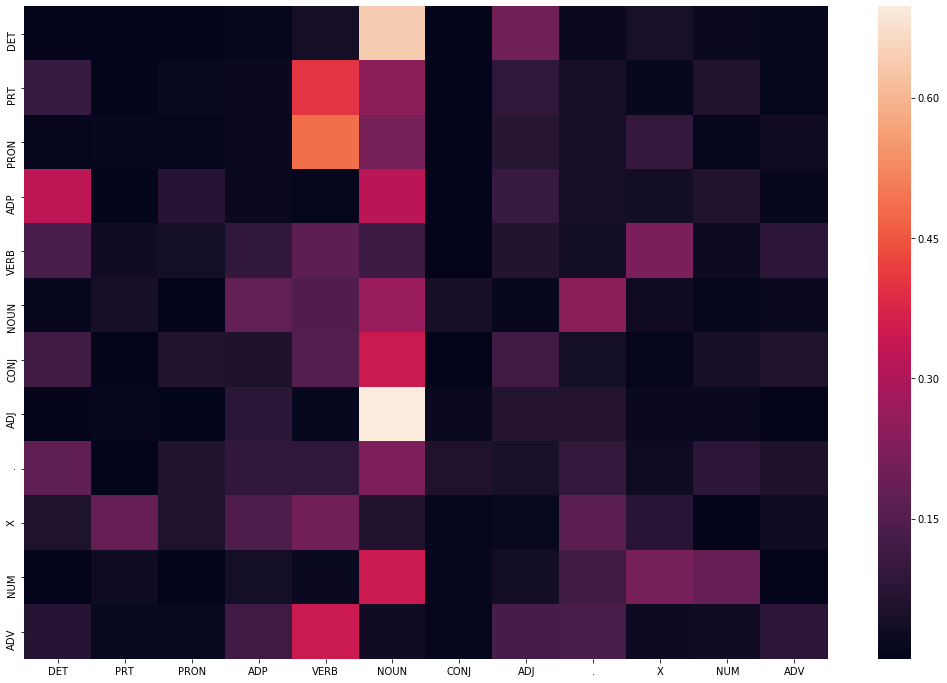

In [37]:
# heatmap of tags matrix
# T(i, j) means P(tag j given tag i)
plt.figure(figsize=(18, 12))
sns.heatmap(tags_df)
plt.show()

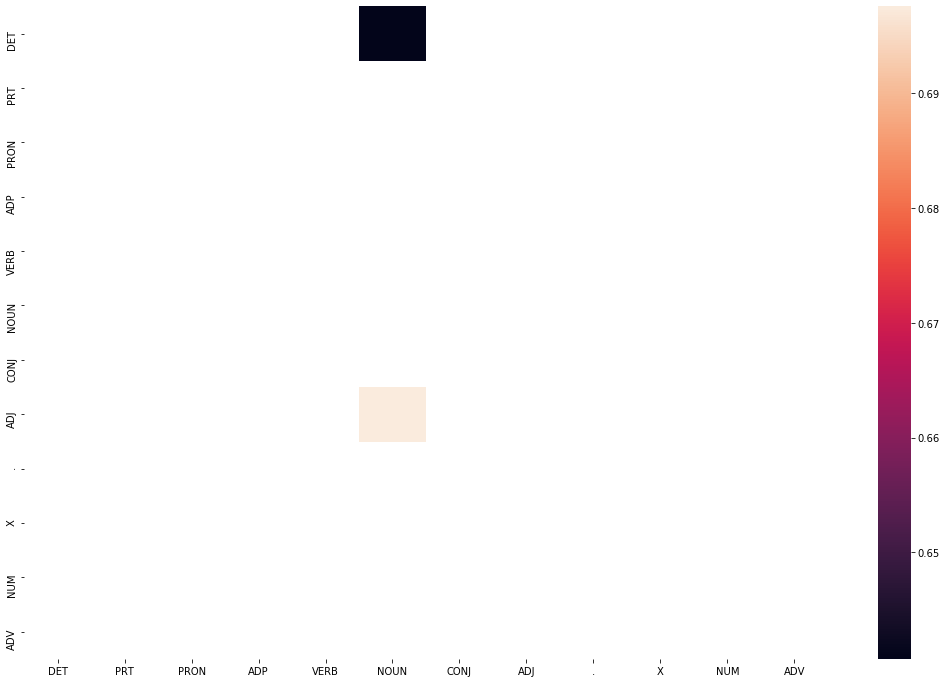

In [38]:
# frequent tags
# filter the df to get P(t2, t1) > 0.5
tags_frequent = tags_df[tags_df>0.5]
plt.figure(figsize=(18, 12))
sns.heatmap(tags_frequent)
plt.show()

### Build the vanilla Viterbi based POS tagger

In [39]:
# Viterbi Heuristic
def Viterbi(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p    
            p.append(state_probability)
            
        pmax = max(p)
        # getting state for which probability is maximum
        state_max = T[p.index(pmax)] 
        state.append(state_max)
    return list(zip(words, state))



In [40]:
# Running on entire test dataset would take more than 3-4hrs. 
# Let's test our Viterbi algorithm on a few sample sentences of test dataset

random.seed(1234)

# choose random 5 sents
rndom = [random.randint(1,len(test_set)) for x in range(5)]

# list of sents
test_run = [test_set[i] for i in rndom]

# list of tagged words
test_run_base = [tup for sent in test_run for tup in sent]

# list of untagged words
test_tagged_words = [tup[0] for sent in test_run for tup in sent]
test_run

[[('*-1', 'X'),
  ('To', 'PRT'),
  ('profit', 'VERB'),
  ('from', 'ADP'),
  ('an', 'DET'),
  ('index-arbitrage', 'ADJ'),
  ('opportunity', 'NOUN'),
  (',', '.'),
  ('someone', 'NOUN'),
  ('who', 'PRON'),
  ('*T*-75', 'X'),
  ('owns', 'VERB'),
  ('the', 'DET'),
  ('S&P', 'NOUN'),
  ('500', 'NUM'),
  ('widget', 'NOUN'),
  ('in', 'ADP'),
  ('New', 'NOUN'),
  ('York', 'NOUN'),
  ('must', 'VERB'),
  ('sell', 'VERB'),
  ('it', 'PRON'),
  ('and', 'CONJ'),
  ('replace', 'VERB'),
  ('it', 'PRON'),
  ('with', 'ADP'),
  ('a', 'DET'),
  ('cheaper', 'ADJ'),
  ('S&P', 'NOUN'),
  ('500', 'NUM'),
  ('widget', 'NOUN'),
  ('in', 'ADP'),
  ('Chicago', 'NOUN'),
  ('.', '.')],
 [('The', 'DET'),
  ('32', 'NUM'),
  ('%', 'NOUN'),
  ('state-owned', 'ADJ'),
  ('DSM', 'NOUN'),
  ('had', 'VERB'),
  ('eight', 'NUM'),
  ('million', 'NUM'),
  ('guilders', 'NOUN'),
  ('of', 'ADP'),
  ('extraordinary', 'ADJ'),
  ('charges', 'NOUN'),
  ('in', 'ADP'),
  ('the', 'DET'),
  ('latest', 'ADJ'),
  ('quarter', 'NOUN'),
  (','

In [41]:
# tagging the test sentences
start = time.time()
tagged_seq_viterbi_vanilla = Viterbi(test_tagged_words)
end = time.time()
difference = end-start

In [42]:
print("Time taken in seconds: ", difference)
print(tagged_seq_viterbi_vanilla)
#print(test_run_base)

Time taken in seconds:  34.86701321601868
[('*-1', 'X'), ('To', 'PRT'), ('profit', 'NOUN'), ('from', 'ADP'), ('an', 'DET'), ('index-arbitrage', 'ADJ'), ('opportunity', 'NOUN'), (',', '.'), ('someone', 'NOUN'), ('who', 'PRON'), ('*T*-75', 'X'), ('owns', 'VERB'), ('the', 'DET'), ('S&P', 'NOUN'), ('500', 'NUM'), ('widget', 'NOUN'), ('in', 'ADP'), ('New', 'NOUN'), ('York', 'NOUN'), ('must', 'VERB'), ('sell', 'VERB'), ('it', 'PRON'), ('and', 'CONJ'), ('replace', 'VERB'), ('it', 'PRON'), ('with', 'ADP'), ('a', 'DET'), ('cheaper', 'ADJ'), ('S&P', 'NOUN'), ('500', 'NUM'), ('widget', 'NOUN'), ('in', 'ADP'), ('Chicago', 'NOUN'), ('.', '.'), ('The', 'DET'), ('32', 'NUM'), ('%', 'NOUN'), ('state-owned', 'ADJ'), ('DSM', 'NOUN'), ('had', 'VERB'), ('eight', 'NUM'), ('million', 'NUM'), ('guilders', 'NOUN'), ('of', 'ADP'), ('extraordinary', 'ADJ'), ('charges', 'NOUN'), ('in', 'ADP'), ('the', 'DET'), ('latest', 'ADJ'), ('quarter', 'NOUN'), (',', '.'), ('mainly', 'ADV'), ('*', 'X'), ('to', 'PRT'), ('refl

eg: 26,000->'DET' it should be number (Calculated incorrectly)

In [43]:
# accuracy of vanilla viterbi
check = [i for i, j in zip(tagged_seq_viterbi_vanilla, test_run_base) if i == j] 

accuracy_vanilla_viterbi = len(check)/len(tagged_seq_viterbi_vanilla)

accuracy_vanilla_viterbi

0.9144736842105263

### Using Vanilla Viterbi we are able to get 91.4% accuracy

### Solve the problem of unknown words

In [44]:
# Using Unigram tagger and rule based taging 

In [45]:
unigram_tagger = nltk.UnigramTagger(train_set)
unigram_tagger.evaluate(test_set)

0.9060918462980319

In [70]:
# Build a Viterbi algorithm where unknown wrds are taken care by rule based patterns

In [46]:
patterns = [
    (r'.*ing$', 'VERB'),              # gerund
    (r'.*ed$', 'VERB'),               # past tense 
    (r'.*es$', 'VERB'),               # verb    
    (r'.*\'s$', 'NOUN'),              # possessive nouns
    (r'.*s$', 'NOUN'),                # plural nouns
    (r'^-?[0-9]+(.[0-9]+)?$', 'NUM'), # cardinal numbers
    (r'.*', 'NOUN')]                     # Unknow words


In [47]:
regexp_tagger = nltk.RegexpTagger(patterns)

In [48]:
regexp_tagger.evaluate(test_set)

0.3343955014058107

In [49]:
# rule based tagger
rule_based_tagger = nltk.RegexpTagger(patterns)


# lexicon backed up by the rule-based tagger
lexicon_tagger = nltk.UnigramTagger(train_set, backoff=rule_based_tagger)


lexicon_tagger.evaluate(test_set)

0.9469540768509841

In [50]:
# Modified Viterbi Algorithm : Backoff to rule based tagger in case unknown word is encountered.
def Viterbi_modified(words, train_bag = train_tagged_words):
    state = []
    T = list(set([pair[1] for pair in train_bag]))
    
    for key, word in enumerate(words):
        #initialise list of probability column for a given observation
        p = [] 
        for tag in T:
            if key == 0:
                transition_p = tags_df.loc['.', tag]
            else:
                transition_p = tags_df.loc[state[-1], tag]
                
            # compute emission and state probabilities
            emission_p = word_given_tag(words[key], tag)[0]/word_given_tag(words[key], tag)[1]
            state_probability = emission_p * transition_p    
            p.append(state_probability)
            
        pmax = max(p)
        state_max = rule_based_tagger.tag([word])[0][1]       
       
        
        if(pmax==0):
            state_max = rule_based_tagger.tag([word])[0][1] 
        else:
            if state_max != 'X':
                # getting state for which probability is maximum
                state_max = T[p.index(pmax)]                
            
        
        state.append(state_max)
    return list(zip(words, state))

In [51]:
# tagging the test sentences
start = time.time()
tagged_seq_viterbi_modified = Viterbi_modified(test_tagged_words)
end = time.time()
difference = end-start

In [52]:
print("Time taken in seconds: ", difference)
print(tagged_seq_viterbi_modified)
#print(test_run_base)

Time taken in seconds:  45.80003094673157
[('*-1', 'X'), ('To', 'PRT'), ('profit', 'NOUN'), ('from', 'ADP'), ('an', 'DET'), ('index-arbitrage', 'ADJ'), ('opportunity', 'NOUN'), (',', '.'), ('someone', 'NOUN'), ('who', 'PRON'), ('*T*-75', 'X'), ('owns', 'VERB'), ('the', 'DET'), ('S&P', 'NOUN'), ('500', 'NUM'), ('widget', 'NOUN'), ('in', 'ADP'), ('New', 'NOUN'), ('York', 'NOUN'), ('must', 'VERB'), ('sell', 'VERB'), ('it', 'PRON'), ('and', 'CONJ'), ('replace', 'VERB'), ('it', 'PRON'), ('with', 'ADP'), ('a', 'DET'), ('cheaper', 'ADJ'), ('S&P', 'NOUN'), ('500', 'NUM'), ('widget', 'NOUN'), ('in', 'ADP'), ('Chicago', 'NOUN'), ('.', '.'), ('The', 'DET'), ('32', 'NUM'), ('%', 'NOUN'), ('state-owned', 'ADJ'), ('DSM', 'NOUN'), ('had', 'VERB'), ('eight', 'NUM'), ('million', 'NUM'), ('guilders', 'NOUN'), ('of', 'ADP'), ('extraordinary', 'ADJ'), ('charges', 'NOUN'), ('in', 'ADP'), ('the', 'DET'), ('latest', 'ADJ'), ('quarter', 'NOUN'), (',', '.'), ('mainly', 'ADV'), ('*', 'X'), ('to', 'PRT'), ('refl

26,000-> NUM (Calculated correctly)

In [53]:
# accuracy of modified viterbi
check = [i for i, j in zip(tagged_seq_viterbi_modified, test_run_base) if i == j] 

accuracy_modified_viterbi = len(check)/len(tagged_seq_viterbi_modified)

accuracy_modified_viterbi

0.9736842105263158

### Using  we are able to get 97.3% accuracy

#### Evaluating tagging accuracy

In [54]:
file_1 = open("Test_sentences.txt","r") 
text = file_1.read()
test_sent = text.splitlines()
file_1.close()

In [55]:
test_sent

['Android is a mobile operating system developed by Google.',
 'Android has been the best-selling OS worldwide on smartphones since 2011 and on tablets since 2013.',
 "Google and Twitter made a deal in 2015 that gave Google access to Twitter's firehose.",
 'Twitter is an online news and social networking service on which users post and interact with messages known as tweets.',
 'Before entering politics, Donald Trump was a domineering businessman and a television personality.',
 'The 2018 FIFA World Cup is the 21st FIFA World Cup, an international football tournament contested once every four years.',
 'This is the first World Cup to be held in Eastern Europe and the 11th time that it has been held in Europe.',
 'Show me the cheapest round trips from Dallas to Atlanta',
 'I would like to see flights from Denver to Philadelphia.',
 'Show me the price of the flights leaving Atlanta at about 3 in the afternoon and arriving in San Francisco.',
 'NASA invited social media users to experienc

In [56]:
test_sent.pop()
test_sent.pop()
test_sent.pop()

''

In [57]:
test_sent

['Android is a mobile operating system developed by Google.',
 'Android has been the best-selling OS worldwide on smartphones since 2011 and on tablets since 2013.',
 "Google and Twitter made a deal in 2015 that gave Google access to Twitter's firehose.",
 'Twitter is an online news and social networking service on which users post and interact with messages known as tweets.',
 'Before entering politics, Donald Trump was a domineering businessman and a television personality.',
 'The 2018 FIFA World Cup is the 21st FIFA World Cup, an international football tournament contested once every four years.',
 'This is the first World Cup to be held in Eastern Europe and the 11th time that it has been held in Europe.',
 'Show me the cheapest round trips from Dallas to Atlanta',
 'I would like to see flights from Denver to Philadelphia.',
 'Show me the price of the flights leaving Atlanta at about 3 in the afternoon and arriving in San Francisco.',
 'NASA invited social media users to experienc

In [58]:
sentence_test=''
# list of untagged words
for sent in test_sent:
    sentence_test = str(sentence_test)+' '+str(sent)

In [59]:
sentence_test

" Android is a mobile operating system developed by Google. Android has been the best-selling OS worldwide on smartphones since 2011 and on tablets since 2013. Google and Twitter made a deal in 2015 that gave Google access to Twitter's firehose. Twitter is an online news and social networking service on which users post and interact with messages known as tweets. Before entering politics, Donald Trump was a domineering businessman and a television personality. The 2018 FIFA World Cup is the 21st FIFA World Cup, an international football tournament contested once every four years. This is the first World Cup to be held in Eastern Europe and the 11th time that it has been held in Europe. Show me the cheapest round trips from Dallas to Atlanta I would like to see flights from Denver to Philadelphia. Show me the price of the flights leaving Atlanta at about 3 in the afternoon and arriving in San Francisco. NASA invited social media users to experience the launch of ICESAT-2 Satellite."

#### Vanilla Viterbi

In [60]:

words = word_tokenize(sentence_test)

start = time.time()
tagged_seq = Viterbi(words)
end = time.time()
difference = end-start

In [61]:
print(tagged_seq)
print(difference)

[('Android', 'DET'), ('is', 'VERB'), ('a', 'DET'), ('mobile', 'ADJ'), ('operating', 'NOUN'), ('system', 'NOUN'), ('developed', 'VERB'), ('by', 'ADP'), ('Google', 'DET'), ('.', '.'), ('Android', 'DET'), ('has', 'VERB'), ('been', 'VERB'), ('the', 'DET'), ('best-selling', 'ADJ'), ('OS', 'DET'), ('worldwide', 'DET'), ('on', 'ADP'), ('smartphones', 'DET'), ('since', 'ADP'), ('2011', 'DET'), ('and', 'CONJ'), ('on', 'ADP'), ('tablets', 'NOUN'), ('since', 'ADP'), ('2013', 'DET'), ('.', '.'), ('Google', 'DET'), ('and', 'CONJ'), ('Twitter', 'DET'), ('made', 'VERB'), ('a', 'DET'), ('deal', 'NOUN'), ('in', 'ADP'), ('2015', 'DET'), ('that', 'ADP'), ('gave', 'VERB'), ('Google', 'DET'), ('access', 'NOUN'), ('to', 'PRT'), ('Twitter', 'DET'), ("'s", 'VERB'), ('firehose', 'DET'), ('.', '.'), ('Twitter', 'DET'), ('is', 'VERB'), ('an', 'DET'), ('online', 'DET'), ('news', 'NOUN'), ('and', 'CONJ'), ('social', 'ADJ'), ('networking', 'NOUN'), ('service', 'NOUN'), ('on', 'ADP'), ('which', 'DET'), ('users', 'NO

#### Modified Viterbi

In [62]:

words = word_tokenize(sentence_test)

start = time.time()
tagged_seq = Viterbi_modified(words)
end = time.time()
difference = end-start

In [63]:
print(tagged_seq)
print(difference)

[('Android', 'NOUN'), ('is', 'VERB'), ('a', 'DET'), ('mobile', 'ADJ'), ('operating', 'NOUN'), ('system', 'NOUN'), ('developed', 'VERB'), ('by', 'ADP'), ('Google', 'NOUN'), ('.', '.'), ('Android', 'NOUN'), ('has', 'VERB'), ('been', 'VERB'), ('the', 'DET'), ('best-selling', 'ADJ'), ('OS', 'NOUN'), ('worldwide', 'NOUN'), ('on', 'ADP'), ('smartphones', 'VERB'), ('since', 'ADP'), ('2011', 'NUM'), ('and', 'CONJ'), ('on', 'ADP'), ('tablets', 'NOUN'), ('since', 'ADP'), ('2013', 'NUM'), ('.', '.'), ('Google', 'NOUN'), ('and', 'CONJ'), ('Twitter', 'NOUN'), ('made', 'VERB'), ('a', 'DET'), ('deal', 'NOUN'), ('in', 'ADP'), ('2015', 'NUM'), ('that', 'ADP'), ('gave', 'VERB'), ('Google', 'NOUN'), ('access', 'NOUN'), ('to', 'PRT'), ('Twitter', 'NOUN'), ("'s", 'PRT'), ('firehose', 'NOUN'), ('.', '.'), ('Twitter', 'NOUN'), ('is', 'VERB'), ('an', 'DET'), ('online', 'NOUN'), ('news', 'NOUN'), ('and', 'CONJ'), ('social', 'ADJ'), ('networking', 'NOUN'), ('service', 'NOUN'), ('on', 'ADP'), ('which', 'DET'), (

Android -> 'DET' to 'NOUN'
Google'-> 'DET' to 'NOUN'
worldwide'-> 'DET' to 'NOUN'

### Compare the tagging accuracies of the modifications with the vanilla Viterbi algorithm

In [64]:
accuracy_vanilla_viterbi

0.9144736842105263

In [65]:
accuracy_modified_viterbi

0.9736842105263158

### Hence we were able to get better ccuray from 92% to 97%

### List down cases which were incorrectly tagged by original POS tagger and got corrected by your modifications

In [66]:
incorrect_tagged_cases_mv = [[test_run_base[i-1],j] for i, j in enumerate(zip(tagged_seq_viterbi_vanilla, test_run_base)) if j[0]!=j[1]]

In [67]:
incorrect_tagged_cases_mv

[[('To', 'PRT'), (('profit', 'NOUN'), ('profit', 'VERB'))],
 [('visiting', 'VERB'), (('about', 'ADP'), ('about', 'ADV'))],
 [('about', 'ADV'), (('26,000', 'DET'), ('26,000', 'NUM'))],
 [('cigarette', 'NOUN'), (('stalls', 'DET'), ('stalls', 'NOUN'))],
 [('illegal', 'ADJ'), (('posters', 'DET'), ('posters', 'NOUN'))],
 [('and', 'CONJ'), (('signboards', 'DET'), ('signboards', 'NOUN'))],
 [('signboards', 'NOUN'), (('advertising', 'NOUN'), ('advertising', 'VERB'))],
 [('$', '.'), (('81.8', 'DET'), ('81.8', 'NUM'))],
 [('of', 'ADP'), (('7.20', 'DET'), ('7.20', 'NUM'))],
 [('the', 'DET'),
  (('most-likely-successor', 'DET'), ('most-likely-successor', 'ADJ'))],
 [('are', 'VERB'), (('Joni', 'DET'), ('Joni', 'NOUN'))],
 [(',', '.'), (('recruited', 'DET'), ('recruited', 'VERB'))],
 [('and', 'CONJ'), (('Sonny', 'DET'), ('Sonny', 'NOUN'))]]

In [68]:
incorrect_tagged_cases_vv = [[test_run_base[i-1],j] for i, j in enumerate(zip(tagged_seq_viterbi_modified, test_run_base)) if j[0]!=j[1]]

In [69]:
incorrect_tagged_cases_vv

[[('To', 'PRT'), (('profit', 'NOUN'), ('profit', 'VERB'))],
 [('visiting', 'VERB'), (('about', 'ADP'), ('about', 'ADV'))],
 [('signboards', 'NOUN'), (('advertising', 'NOUN'), ('advertising', 'VERB'))],
 [('the', 'DET'),
  (('most-likely-successor', 'NOUN'), ('most-likely-successor', 'ADJ'))]]